In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Step One

In [28]:
# 'confirmed_number', 'dead_number', 'recovered_number', 'recovery', 'mortality', 'contagion'
series_category = 'dead_number'
history = pd.read_csv('output/covid_forecast/'+series_category+'/' + 'history.csv', index_col=0)
median = pd.read_csv('output/covid_forecast/'+series_category+'/' + 'prediction_median.csv', index_col=0)
# quantile10 = pd.read_csv('output/step_one/'+series_category+'/' + 'quantile10.csv', index_col=0)
# quantile90 = pd.read_csv('output/step_one/'+series_category+'/' + 'quantile90.csv', index_col=0)
quantile35 = pd.read_csv('output/covid_forecast/'+series_category+'/' + 'prediction_lower.csv', index_col=0)
quantile65 = pd.read_csv('output/covid_forecast/'+series_category+'/' + 'prediction_upper.csv', index_col=0)

history.index = pd.to_datetime(history.index)
median.index = pd.to_datetime(median.index)
# quantile10.index = pd.to_datetime(quantile10.index)
# quantile90.index = pd.to_datetime(quantile90.index)
quantile35.index = pd.to_datetime(quantile35.index)
quantile65.index = pd.to_datetime(quantile65.index)

In [40]:
countrys = ['China']# Philippines Singapore Afghanistan  India
countrys = quantile35.columns
for country in countrys:
    color = 'green'
    plt.figure(figsize=(10,6))
    plt.plot(history[country].iloc[-100:], '-', label='history')
    plt.plot(median[country], color=color, label='median')
    # plt.plot(quantile35[country], color='b', label='lower')
    # plt.plot(quantile65[country], color='y', label='upper')
    plt.fill_between(quantile35[country].index,quantile35[country],quantile65[country],color=color, alpha=0.5, label='distribution interval')
    # plt.fill_between(quantile10[country].index,quantile10[country],quantile90[country],color=color, alpha=0.25, label='80% probability interval')
    plt.title(country + ':' + series_category)
    plt.legend(loc='upper left')
    plt.savefig('pics/' + series_category + '_prob.png', bbox_inches='tight', dpi=100)
    plt.show()

# step two

## indicator influence

In [14]:
def indicator_influence(name):
    indicator_mortality = pd.read_csv('output/policy_effectiveness/'+name+'.csv')
#     indicator_mortality['indicator'] = indicator_mortality.Indicator + "[" + indicator_mortality.Unit + ']'
    indicator_mortality = indicator_mortality[['Indicator', 'Correlation']][:29][::-1]
    plt.figure(figsize=(10,10))
    plt.barh(indicator_mortality.Indicator, indicator_mortality.Correlation,color='b', align='center')
    plt.title(name + ' Correlation Coefficient')
    plt.savefig('pics/' + name + '.png', bbox_inches='tight', dpi=100)
    

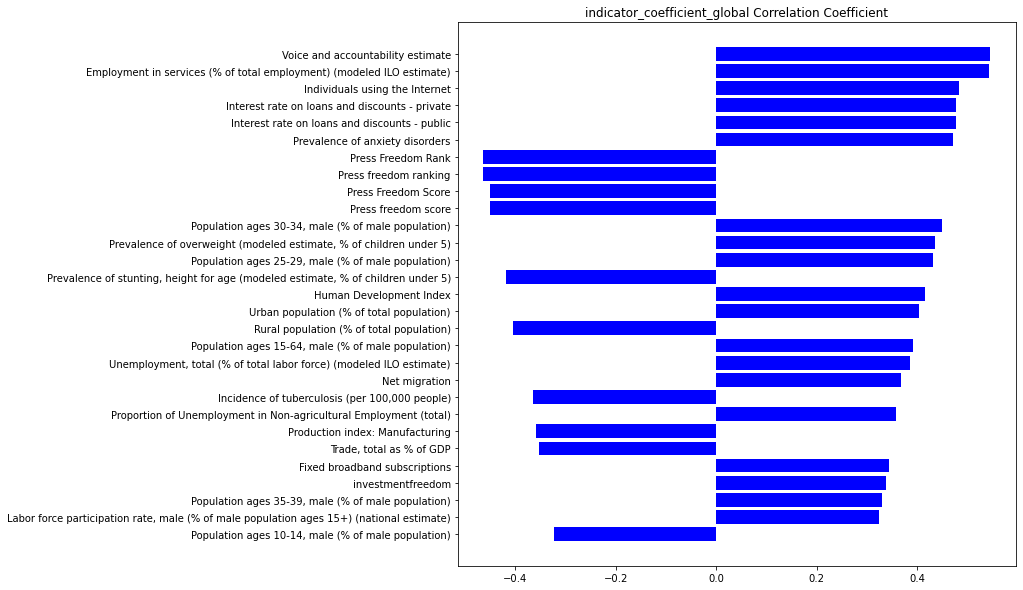

In [15]:
indicator_influence('indicator_coefficient_global')  # indicator_mortality   indicator_recovery indicator_contagion

## policy influence

In [16]:
def policy_influence(name):
    indicator_mortality = pd.read_csv('output/policy_effectiveness/'+name+'.csv')
#     indicator_mortality['indicator'] = indicator_mortality.Indicator + "[" + indicator_mortality.Unit + ']'
    indicator_mortality = indicator_mortality[['Policy', 'score']][:29][::-1]
    plt.figure(figsize=(7,10))
    plt.barh(indicator_mortality.Policy, indicator_mortality.score,color='b', align='center')
    plt.title(name + ' Importance')
    plt.savefig('pics/' + name + '.png', bbox_inches='tight', dpi=100)
    

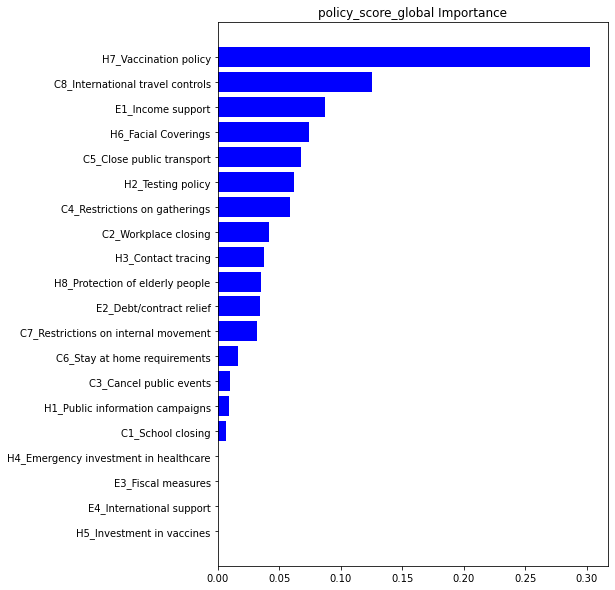

In [17]:
policy_influence('policy_score_global')  # policy_mortality  policy_recovery policy_contagion

## country policy influence

In [99]:
def country_policy_influence(name, Country):
    indicator_mortality = pd.read_csv('output/step_two/country_policy_influence/'+name+'.csv')
    indicator_mortality = indicator_mortality[indicator_mortality.Country == Country]
#     indicator_mortality['indicator'] = indicator_mortality.Indicator + "[" + indicator_mortality.Unit + ']'
    indicator_mortality = indicator_mortality[['Policy', 'importance']][:29][::-1]
    plt.figure(figsize=(10,7))
    plt.barh(indicator_mortality.Policy, indicator_mortality.importance,color='b', align='center')
    plt.title(Country + ':' + name + ' Correlation Coefficient')
    plt.savefig('pics/' + Country + '_' + name + '.png', bbox_inches='tight', dpi=100)

In [100]:
def plt_attention(A, xticks, yticks, name):
    """ Generates a heat map for the attention matrix.
    
        Args:
            A: torch.Tensor of shape (batch_size, 1, max_length, max_length)
                The attention matrix.
            xticks: list of string
                The labels to use for the x-axis ticks.
            yticks: list of string
                The labels to use for the y-axis ticks.
                
        Returns:
            None
    """
    # Sanity checks
    assert(A.shape[0] == len(xticks) and A.shape[1] == len(yticks))
    
    # Make plot bigger so its easier to read
    plt.rcParams["figure.figsize"] = 14, 8
    
    # Make x-ticks and label appear on top
    plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
    plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
    
    # Plot the attention distribution
#     plt.matshow(A)
    plt.imshow(A, cmap="rainbow", interpolation="nearest")
    plt.yticks(range(len(xticks)), xticks)
    plt.xticks(range(len(yticks)), yticks, rotation=90)
    plt.colorbar()
    plt.title('Country Policy Influence:' + name)
    plt.savefig('pics/atten_'+ name +'.png', dpi=300, bbox_inches='tight')    
    plt.show()

In [101]:
def all_country_policy_influence(name):
    indicator_mortality = pd.read_csv('output/step_two/country_policy_influence/'+'policy_mortality'+'.csv')
    indicator_mortality = indicator_mortality.pivot(index='Policy', columns='Country', values='importance').fillna(0)
    plt_attention(indicator_mortality, indicator_mortality.index, indicator_mortality.columns, name)

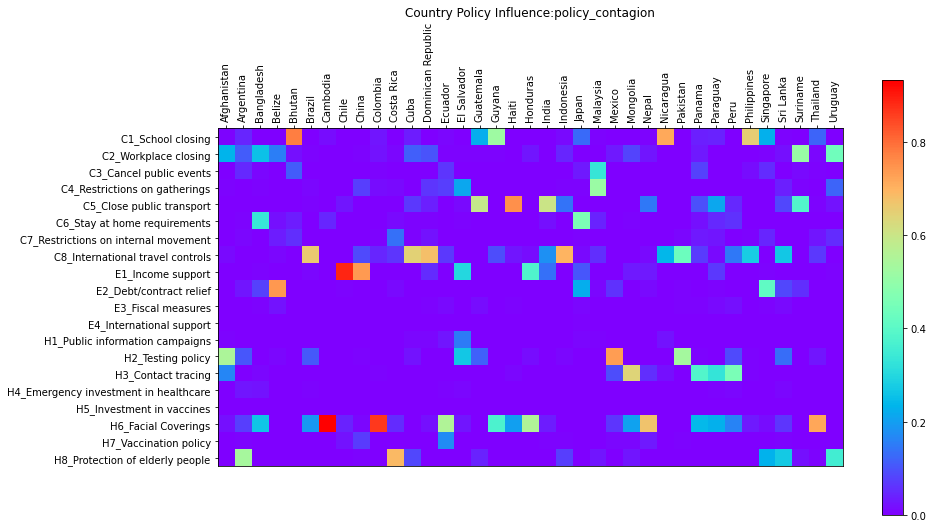

In [102]:
all_country_policy_influence('policy_contagion')  # policy_mortality  policy_recovery policy_contagion

In [103]:
# country_policy_influence('policy_mortality', 'Philippines')  # policy_mortality  policy_recovery

## policy indicator

In [24]:
def plt_attention_2(A, xticks, yticks, name):
    """ Generates a heat map for the attention matrix.
    
        Args:
            A: torch.Tensor of shape (batch_size, 1, max_length, max_length)
                The attention matrix.
            xticks: list of string
                The labels to use for the x-axis ticks.
            yticks: list of string
                The labels to use for the y-axis ticks.
                
        Returns:
            None
    """
    # Sanity checks
    assert(A.shape[0] == len(xticks) and A.shape[1] == len(yticks))
    
    # Make plot bigger so its easier to read
    plt.rcParams["figure.figsize"] = 20, 20
    
    # Make x-ticks and label appear on top
    plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
    plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
    
    # Plot the attention distribution
#     plt.matshow(A)
    plt.imshow(A, cmap="rainbow", interpolation="nearest")
    plt.yticks(range(len(xticks)), xticks)
    plt.xticks(range(len(yticks)), yticks, rotation=90)
    plt.colorbar()
    plt.title('Policy Indicator')
    plt.savefig('pics/atten_'+ name +'.png', dpi=300, bbox_inches='tight')    
    plt.show()

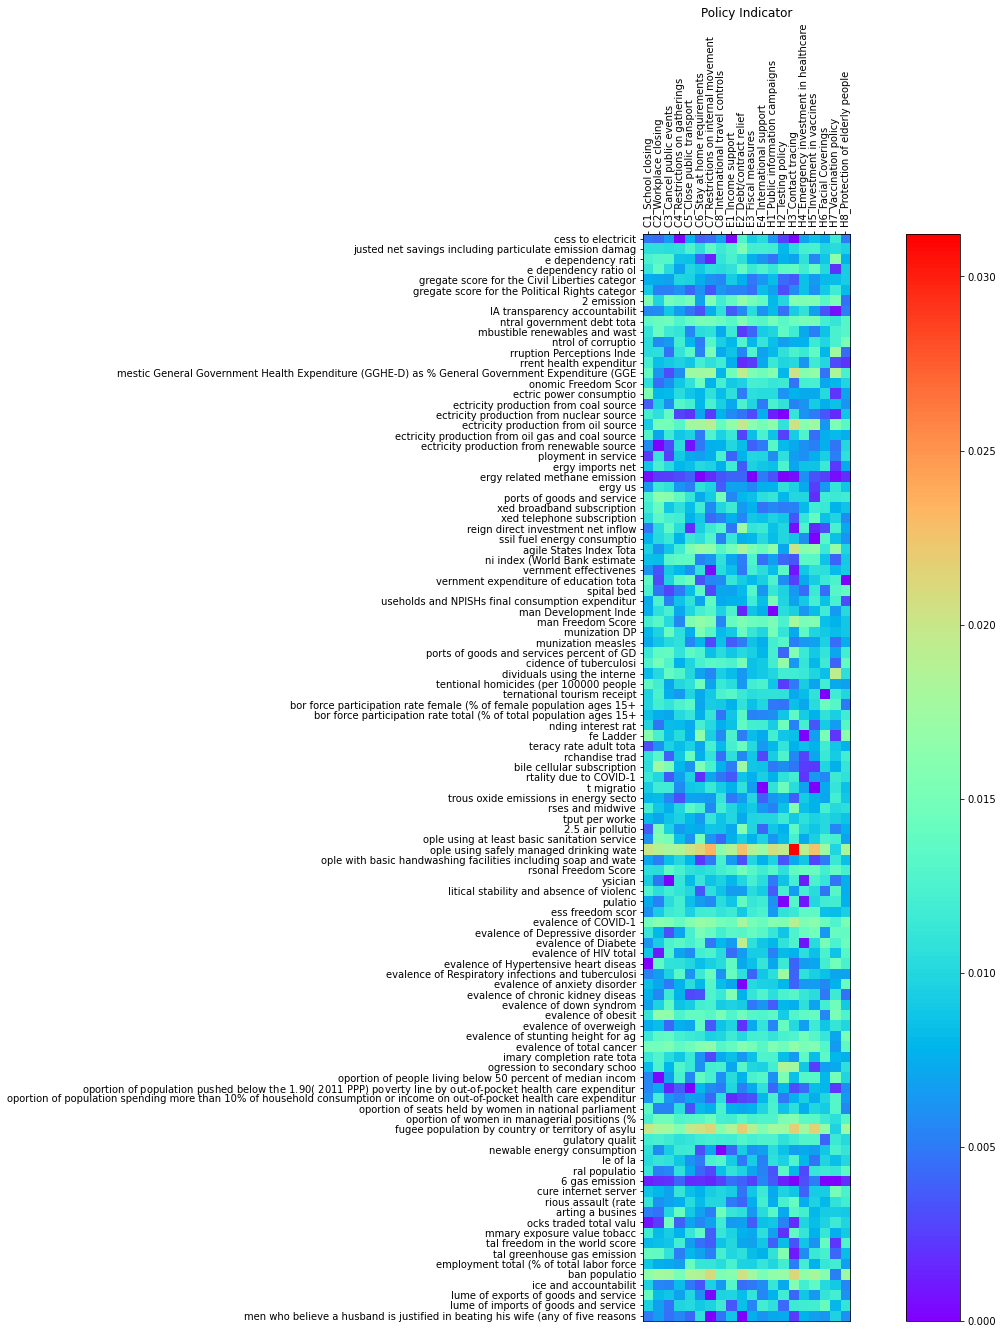

In [25]:
policy_indicator = pd.read_csv('output/policy_effectiveness/top_indicators_per_policy_overall.csv')
policy_indicator = policy_indicator.pivot(index='Indicator', columns='Policy', values='score').fillna(0)
plt_attention_2(policy_indicator, [''.join(x.split(',')[:2])[2:-1] for x in policy_indicator.index], policy_indicator.columns, 'policy_indicator')

# Step three

In [106]:
# 'confirmed', 'deaths', 'recovery', 'recovery', 'mortality', 'contagion'
series_category = 'contagion'
history = pd.read_csv('output/step_three/'+series_category+'/' + 'history.csv', index_col=0)
median = pd.read_csv('output/step_three/'+series_category+'/' + 'prediction.csv', index_col=0)

history.index = pd.to_datetime(history.index)
median.index = pd.to_datetime(median.index)


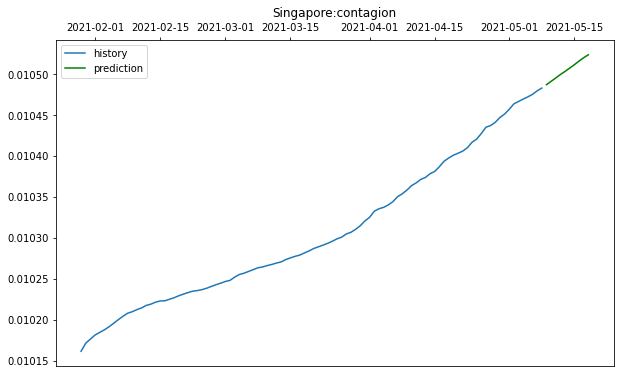

In [107]:
country = 'Singapore'# 'Philippines'
color = 'green'
plt.figure(figsize=(10,6))

plt.plot(history[country].iloc[-100:], '-', label='history')
plt.plot(median[country], color=color, label='prediction')


plt.title(country + ':' + series_category)
plt.legend(loc='upper left')
plt.savefig('pics/' + series_category + '.png', bbox_inches='tight', dpi=100)
plt.show()

In [2]:
import pandas as pd
import json
import os

In [39]:
policy_rank_score = pd.read_csv('output/Final results/compiled_policy ranking and scores.csv')
for key, group in policy_rank_score.groupby('policy'):
    if not os.path.exists('output/Roland/policy_rank_score'):
        os.makedirs('output/Roland/policy_rank_score')
    res_dict = {}
    res_dict['source'] = "First confirmed case\\policy strictness score and ranking.dta"
    res_dict["name"] = "DataSet"
    res_dict['data'] = {}
    for key1, group1 in group.groupby('monthly_group'):
        tmp_json = group[['iso', 'policy', 'score', 'rank']].to_dict(orient='records')
        res_dict['data'][key1] = {}
        res_dict['data'][key1]['label'] = key1
        res_dict['data'][key1]['data'] = tmp_json
    res_json = json.dumps(res_dict,indent=1)
    f2 = open('output/Roland/policy_rank_score/' + key + '.json', 'w')
    f2.write(res_json)
    f2.close()

In [6]:
# policy_rank_score = pd.read_csv('output/Final results/compiled_policy ranking and scores.csv')



In [10]:
print(sorted(list(set(policy_rank_score['label']))))

['Month 1', 'Month 10', 'Month 11', 'Month 12', 'Month 13', 'Month 14', 'Month 15', 'Month 16', 'Month 17', 'Month 18', 'Month 2', 'Month 3', 'Month 4', 'Month 5', 'Month 6', 'Month 7', 'Month 8', 'Month 9', 'Overall']


In [38]:
['Month 1', 'Month 2', 'Month 3', 'Month 4', 'Month 5', 'Month 6', 'Month 7', 'Month 8', 'Month 9', 'Month 10', 'Month 11', 'Month 12', 'Month 13', 'Month 14', 'Month 15', 'Month 16', 'Month 17', 'Month 18', 'Overall']